In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Modelo de regression Logistica

$$\hat{y} = p = \dfrac{1}{1 + \exp{-(\theta_0 + \theta_1 x)}} $$

In [2]:
# El modelo de regression logistica asume que la relacion entre variables esta mediada por la funcion logistica

def y_hat(theta_0, theta_1, x):
    p = 1. / (1. + np.exp(-(theta_0 + theta_1 * x)))
    return(p)


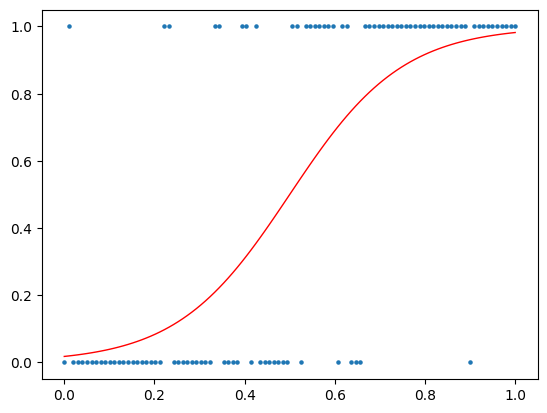

In [3]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [-4, 8]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.binomial(1, y_hat(theta_0, theta_1, x1), n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = 1)

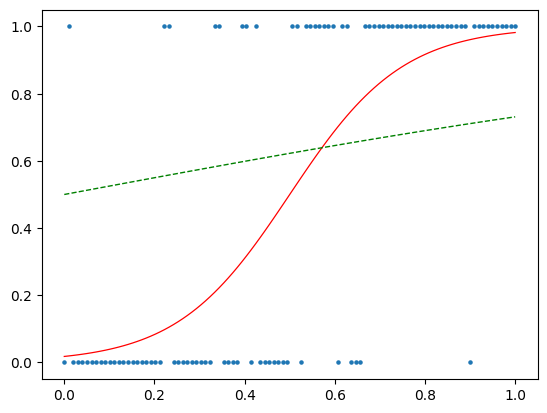

In [4]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 0
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

La recta verde no está ajustando bien

## Loss function

$$ \mathcal{L} = -\dfrac{1}{n} \sum \left(Y \log(\hat{y}) + (1-Y) \log(1 - \hat{y}) \right)$$

In [5]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 0.6238128157276561


In [6]:
# Llevamos regsitro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

## Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = \sum \hat{y} - y $$

$$\nabla_{\theta_1} \mathcal{L} = \sum (\hat{y} - y) x $$

In [9]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho = .01


In [22]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')


[0, -0.10006820538605986, -0.5072394973641522, -0.8208998433805259, -1.3388463074041033, -1.9276440046062593, -2.969062863008708, -2.823040310652938, -3.1241743490014473, -3.134684037627604]
[1, 1.0416506791340587, 1.4751697159982022, 2.2823541552398483, 3.1548112308199046, 4.911740603309041, 6.028218238383581, 6.078168982070553, 6.690021348337418, 6.689666865315143]
[0.6238128157276561, 0.6132941019947953, 0.5698680959063401, 0.5232055325197534, 0.4779278154694414, 0.43961378236236587, 0.4110122571604145, 0.41048967053683316, 0.40668843670136606, 0.40658548216120416]


Text(0.5, 1.0, 'Loss en funcion del Epoch')

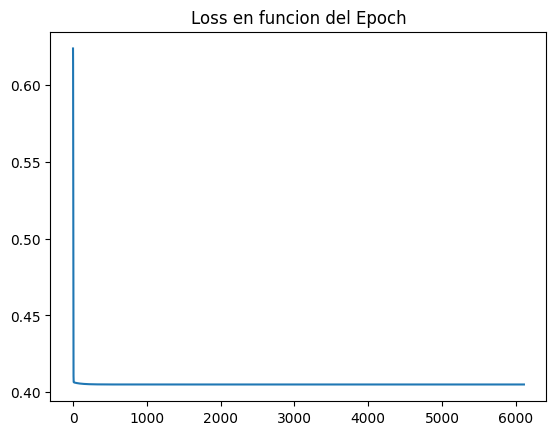

In [39]:
epoch = 100

for i in range(epoch):
    t0 -= rho6 * delta_theta_0(y, x1, t0, t1)
    t1 -= rho6 * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)

plt.plot(error)
plt.title("Loss en funcion del Epoch")

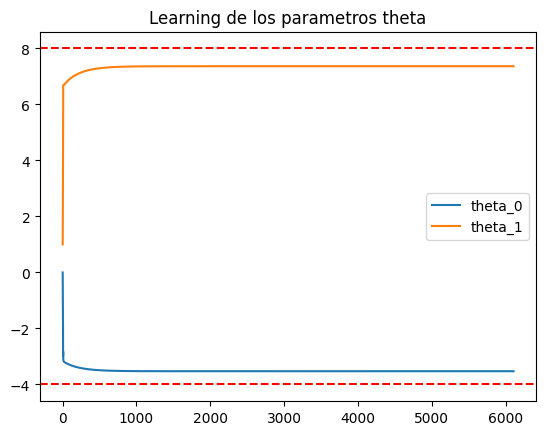

In [40]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

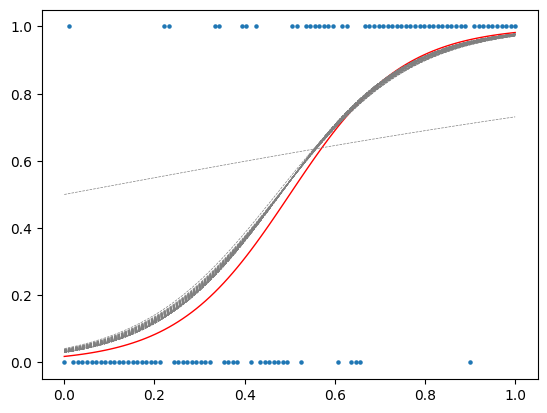

In [41]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

Text(0, 0.5, 'theta_1')

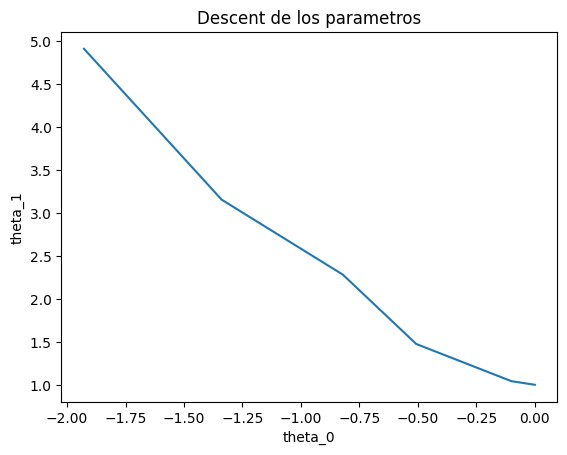

In [42]:
plt.plot(t0_hat[0:6], t1_hat[0:6])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')

In [43]:
# Ejemplo de SGD con librerias

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [44]:
x, y = make_regression(n_samples=100, n_features=30)

sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


In [45]:
sgdr.fit(x, y)

score = sgdr.score(x, y)
print("R-squared:", score)


R-squared: 0.9999983897099602


In [50]:
from sklearn.linear_model import LogisticRegression

In [54]:
x1_reshape=x1.reshape(-1,1)

log_reg1 = LogisticRegression(penalty = None).fit(x1_reshape, y)
log_reg2 = LogisticRegression(penalty = 'l2').fit(x1_reshape, y)

# Arreglar

ValueError: ignored

In [48]:
print('theta_0:', log_reg1.intercept_, '\n', 
      'theta_1:', log_reg1.coef_)

NameError: ignored

In [49]:
print('theta_0:', log_reg2.intercept_, '\n', 
      'theta_1:', log_reg2.coef_)

NameError: ignored

# TAREA:

1. Modificar el step size/learning rate y ver que pasa.
2. Graficar theta_0 vs theta_1, y ver como se mueve el punto en el plano (mostrar con colores, flechas, etc. el movimiento)
3. Simular y ajustar/learn los parametros del modelo (https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics): 
$$ f(x, \theta_0, \theta_1) = y = \dfrac{\theta_0  x}{(\theta_1 + x)} + \epsilon $$

Enviar el codigo con comentarios. Subir la tarea a su cuenta de GIT y me envian el link.

> Desarrollo de Tarea

Utilizando la implementación presentada por el profesor, iremos observando qué ocurre con ciertas modificaciones que se piden.


### Modificamos el step size
##### En el método GD cambiamos los valores del step size para ver su comportamiento ante esta modificación



In [20]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho1 = .01
rho2 = .05
rho3 = .09
rho4 = .1
rho5 = .2
rho6 = .15
rho7 = .11
rho8 = .25


In [21]:
t0 -= rho8 * delta_theta_0(y, x1, t0, t1)
t1 -= rho8 * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')


[0, -0.10006820538605986, -0.5072394973641522, -0.8208998433805259, -1.3388463074041033, -1.9276440046062593, -2.969062863008708, -2.823040310652938, -3.1241743490014473]
[1, 1.0416506791340587, 1.4751697159982022, 2.2823541552398483, 3.1548112308199046, 4.911740603309041, 6.028218238383581, 6.078168982070553, 6.690021348337418]
[0.6238128157276561, 0.6132941019947953, 0.5698680959063401, 0.5232055325197534, 0.4779278154694414, 0.43961378236236587, 0.4110122571604145, 0.41048967053683316, 0.40668843670136606]


Se puede ver de los resultados obtenidos:

[0, -0.10006820538605986, -0.5072394973641522, -0.8208998433805259, -1.3388463074041033, -1.9276440046062593, -2.969062863008708, -2.823040310652938, -3.1241743490014473]

[1, 1.0416506791340587, 1.4751697159982022, 2.2823541552398483, 3.1548112308199046, 4.911740603309041, 6.028218238383581, 6.078168982070553, 6.690021348337418]

[0.6238128157276561, 0.6132941019947953, 0.5698680959063401, 0.5232055325197534, 0.4779278154694414, 0.43961378236236587, 0.4110122571604145, 0.41048967053683316, 0.40668843670136606]

Notamos que a medida que hacemos crecer el learning_rate el error va disminuyendo y t0_hat, t1_hat se van acercando al valor inicial más rápido si rho es grande. Si rho tiene valores pequeños el error disminuye más lento.

Además pudimos notar que a medida que nuestra aproximación se acerca a nuestros parametros theta_0 "intercepto' y theta_1 "pendiente" [-4,8] empieza a disminuir la velocidad y se acerca más lento, aunque el step size sea relativamente grande (como lo valores probados).

También al probar las modificaciones de los rho en la gráfica de "Loss en funcion del epoch" no varía mucho. Tampoco varía en la gráfica de "Learning de los parametros theta"





## Simular

####A continuación trabajaremos con la nueva función. 



In [64]:
epsilon = np.random.normal(0,0.1,100)

In [65]:
def y_hat(theta_0, theta_1,x):
  p = ((theta_0*x)/(theta_1 + x)) + epsilon
  return p 

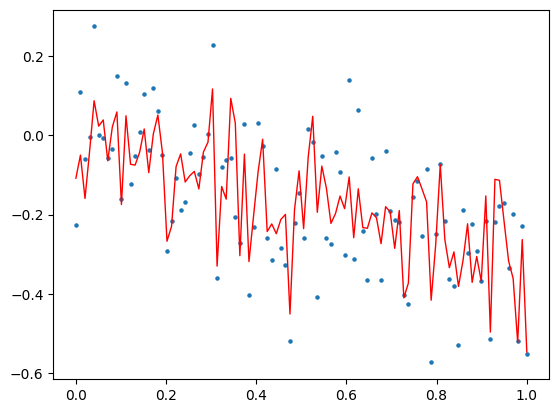

In [66]:
# Simulemos igual que antes 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [-2, 5]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.normal(y_hat(theta_0, theta_1, x1),0.1, n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-2, 5, x1), color='red', linewidth = 1)

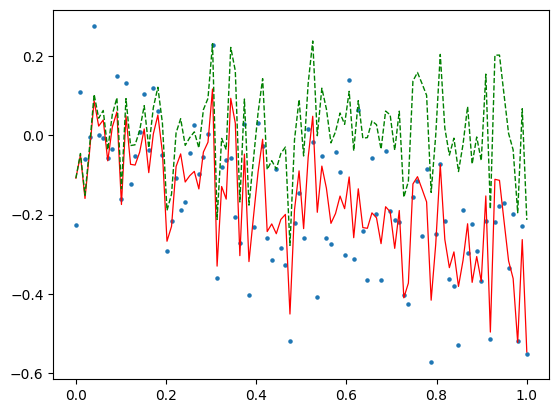

In [67]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 0
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-2, 5, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

In [68]:
# Definimos nuestra nueva Loss function
def loss_fun(Y, X, t0, t1):
    loss = (Y-y_hat(t0,t1,X))*(Y-y_hat(t0,t1,X))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: [1.42358450e-02 2.37312921e-02 8.41057244e-03 6.65635622e-04
 2.94068854e-02 1.76161501e-03 4.78154028e-03 4.59585100e-04
 7.75627791e-03 3.12445538e-03 7.20229702e-04 1.53928020e-03
 9.49529412e-03 8.49000171e-04 2.21716510e-05 8.22581230e-04
 2.92952270e-05 2.34916862e-03 3.65255521e-03 6.34577996e-03
 1.04876197e-02 4.46163718e-03 1.27459071e-02 5.26744614e-02
 2.07796155e-02 1.47437515e-03 2.95133448e-04 4.48602222e-03
 1.42918853e-02 8.28426117e-03 9.83195477e-06 2.19766994e-02
 5.31062624e-03 6.75491670e-04 7.73780902e-02 1.35729620e-01
 1.06481759e-02 4.08515734e-03 5.15955890e-02 3.02414935e-02
 7.07038941e-04 2.88362342e-02 3.00257578e-02 6.33207135e-02
 1.36304183e-06 5.75407368e-02 8.87396345e-02 5.88452858e-02
 4.39906632e-02 5.54552432e-02 4.33339897e-02 1.34447883e-02
 6.52444831e-02 1.66883558e-01 2.96645185e-02 1.05938908e-01
 6.47500846e-02 2.54895304e-03 2.22878614e-02 1.08676586e-01
 7.88411014e-04 7.44027234e-02 5.01733732e-04 5.51960549e-02
 1.2969133

In [69]:
# Llevamos regsitro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

In [70]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = -y*(x1/(t1+x1))-(x1/(t1+x1))*y+2*x1*(x1/(t1+x1))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = y*(t0*x1)+(t0*x1)*y-(t0*x1/(t1+x1))*(t1*x1)
    return(delta_1)


# Step size o learnig rate
rho = .01


In [72]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')

[0, array([ 0.00000000e+00,  3.92327010e-05, -6.32357052e-05, -3.96848241e-05,
        3.64287575e-04, -9.45676317e-05, -1.53063866e-04, -3.39717799e-04,
       -3.46710239e-04,  1.99046737e-04, -9.64775993e-04,  8.35942267e-05,
       -1.05723248e-03, -8.56041255e-04, -6.62686685e-04, -2.52273747e-04,
       -1.10532859e-03, -3.12701270e-04, -7.43396157e-04, -1.55349122e-03,
       -3.32224477e-03, -2.99126130e-03, -2.39090945e-03, -3.16682283e-03,
       -3.21517433e-03, -2.39300668e-03, -1.96923651e-03, -3.18526111e-03,
       -2.97536090e-03, -2.63355313e-03, -6.95614915e-04, -6.42732373e-03,
       -3.94669565e-03, -3.95393521e-03, -4.08630541e-03, -5.84158696e-03,
       -6.77471131e-03, -3.76509029e-03, -8.73463787e-03, -7.07881200e-03,
       -4.30027378e-03, -5.16361143e-03, -8.15154864e-03, -9.08320810e-03,
       -6.50446852e-03, -9.25306876e-03, -1.00530083e-02, -1.28152186e-02,
       -9.21509007e-03, -8.47545040e-03, -1.02733196e-02, -6.79771338e-03,
       -7.47127940e-0

Text(0.5, 1.0, 'Loss en funcion del Epoch')

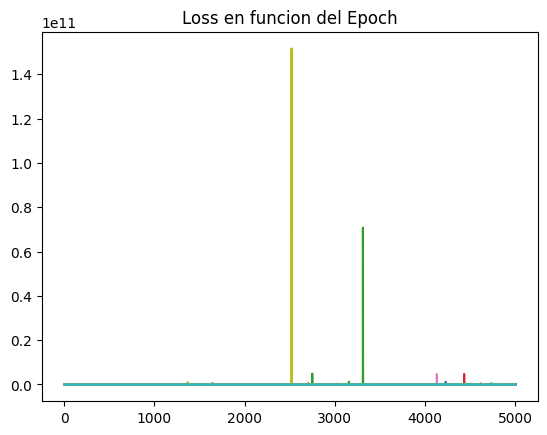

In [73]:
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)
    
plt.plot(error)
plt.title("Loss en funcion del Epoch")

In [80]:
#plt.plot(t0_hat, label = 'theta_0')
#plt.axhline(y = theta_0, color='red', linestyle='--')

#plt.plot(t1_hat, label = 'theta_1')
#plt.axhline(y = theta_1, color='red', linestyle='--')

#plt.title("Learning de los parametros theta")
#plt.legend()

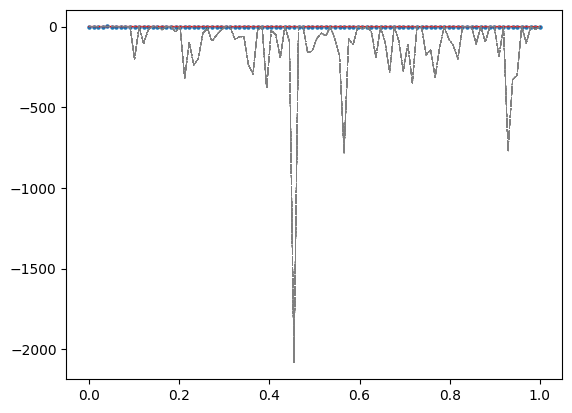

In [77]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-2, 5, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

In [79]:
#plt.plot(t0_hat[0:6], t1_hat[0:6])

#plt.title("Descent de los parametros")
#plt.xlabel('theta_0')
#plt.ylabel('theta_1')